In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_excel("C:\Surya\DA\Hackathons\Python Hackathon Dec2023\Exam Stress Final.xlsx",sheet_name=None)
grades=df['Grades']
demography=df['Demography']
eda=df['EDA']
hr=df['HR']
temp=df['Temp']
ibi=df['IBI']


Q1. Using the mean interbeat interval per minute, calculate the Root Mean Square of successive differences for any 30 minute interval and add this to IBI

In [37]:
ibi['RMSSD'] = ibi.groupby(['Student_id', 'Exam'])['IBI'].transform(lambda x: np.sqrt(np.mean(np.diff(x) ** 2)))

# Calculate the mean exam duration for each student
exam_durations = ibi.groupby(['Student_id', 'Exam'])['Time in mins'].max()

# Calculate the adjustment factor based on exam duration (assuming 30 minutes for RMSSD calculation)
ibi['Adjusted_RMSSD'] = ibi.apply(lambda row: row['RMSSD'] * np.sqrt(30 / exam_durations[(row['Student_id'], row['Exam'])]), axis=1)

# Display the DataFrame with RMSSD and Adjusted_RMSSD
print(ibi)

      Time in mins    IBI Student_id       Exam     RMSSD  Adjusted_RMSSD
0                0  0.446        S01      final  0.105728        0.031178
1                1  0.473        S01      final  0.105728        0.031178
2                3  0.444        S01      final  0.105728        0.031178
3                4  0.496        S01      final  0.105728        0.031178
4                8  0.448        S01      final  0.105728        0.031178
...            ...    ...        ...        ...       ...             ...
3310           159  0.463       S010  midterm 2  0.073832        0.030835
3311           160  0.391       S010  midterm 2  0.073832        0.030835
3312           170  0.393       S010  midterm 2  0.073832        0.030835
3313           171  0.566       S010  midterm 2  0.073832        0.030835
3314           172  0.402       S010  midterm 2  0.073832        0.030835

[3315 rows x 6 columns]


Q2. Group the rows in the file EDA into 3 parts based on time: First, Second, Third part of each exam


In [5]:
def time_part(time, max_time):
    interval = max_time / 3
    
    if 0 <= time < interval:
        return 'First'
    elif interval <= time < 2 * interval:
        return 'Second'
    else:
        return 'Third'    
max_times = eda.groupby('Exam')['Time in mins'].max()
eda['Time Category'] = eda.apply(lambda row: time_part(row['Time in mins'], max_times[row['Exam']]), axis=1)
print(eda[['Time in mins', 'Exam', 'Time Category']])

      Time in mins       Exam Time Category
0                1      final         First
1                2      final         First
2                3      final         First
3                4      final         First
4                5      final         First
...            ...        ...           ...
7369           212  midterm 2         Third
7370           213  midterm 2         Third
7371           214  midterm 2         Third
7372           215  midterm 2         Third
7373           216  midterm 2         Third

[7374 rows x 3 columns]


Q3. Based on the calculation in question 2, which part of the exam did students suffer maximum stress? You may assume that higher recorded skin conductance co-incides with high levels of stress


In [6]:
average_eda = eda.groupby('Time Category')['EDA'].mean()

max_stress_part = average_eda.idxmax()

print(f"The '{max_stress_part}' part of the exam gives more stress to students")


The 'Second' part of the exam gives more stress to students


Q4. Using Root Mean Square of Successive differences calculated in Q1, calculate and store HRV per exam for every student. 


In [39]:
ibi['RMSSD'] = ibi.groupby(['Student_id', 'Exam'])['IBI'].transform(lambda x: np.sqrt(np.mean(np.diff(x) ** 2)))

# Calculate the mean RMSSD per exam for every student
hrv = ibi.groupby(['Student_id', 'Exam'])['RMSSD'].mean().reset_index()

# Adjust HRV for the difference in exam duration (assuming 30 minutes for RMSSD calculation)
exam_durations = ibi.groupby(['Student_id', 'Exam'])['Time in mins'].max()
hrv['HRV'] = hrv.apply(lambda row: row['RMSSD'] * np.sqrt(30 / exam_durations[(row['Student_id'], row['Exam'])]), axis=1)

# Display the DataFrame with Adjusted HRV per exam for every student
print(hrv)

   Student_id       Exam     RMSSD       HRV
0         S01      final  0.105728  0.031178
1         S01  midterm 1  0.146946  0.060842
2         S01  midterm 2  0.106307  0.044397
3        S010      final  0.074598  0.027239
4        S010  midterm 1  0.195021  0.079839
5        S010  midterm 2  0.073832  0.030835
6         S02      final  0.046262  0.014232
7         S02  midterm 1  0.209621  0.083076
8         S02  midterm 2  0.142914  0.052185
9         S03      final  0.097106  0.035697
10        S03  midterm 1  0.223070  0.087948
11        S03  midterm 2  0.078873  0.035391
12        S04      final  0.135062  0.049100
13        S04  midterm 1  0.153480  0.062658
14        S04  midterm 2  0.194231  0.071888
15        S05      final  0.117795  0.043302
16        S05  midterm 1  0.248910  0.099697
17        S05  midterm 2  0.038738  0.017382
18        S06      final  0.084291  0.023378
19        S06  midterm 1  0.239818  0.100449
20        S06  midterm 2  0.148883  0.055104
21        

Q7. "Using numpy functions, transpose and multiply the following arrays
a=np.arange(4).reshape(2,2)
b=np.arange(6).reshape(3,2) "

In [18]:
a = np.arange(4).reshape(2, 2)
b = np.arange(6).reshape(3, 2)
print("\n Array a:")
print(a)
print("\n Array b:")
print(b)
print("\nTransposed Array a:")
print(np.transpose(a))

print("\nTransposed Array b:")
print(np.transpose(b))

print("\nResult of Transposed Multiplication:")
print(np.dot(a_transposed, b_transposed))


 Array a:
[[0 1]
 [2 3]]

 Array b:
[[0 1]
 [2 3]
 [4 5]]

Transposed Array a:
[[0 2]
 [1 3]]

Transposed Array b:
[[0 2 4]
 [1 3 5]]

Result of Transposed Multiplication:
[[ 2  6 10]
 [ 3 11 19]]


Q8.Write a Python program to create an array of 5 integers and display the array items in reverse order

In [13]:
array1 = np.array([1, 2, 3, 4, 5])
print("Array Created:", array1)

rev_array1 = np.flip(array1)
print("\nArray in Reverse Order:", rev_array1)

Array Created: [1 2 3 4 5]

Array in Reverse Order: [5 4 3 2 1]


Q9. What was the average grade for all students in the final exam vs both midterms

In [16]:
average_grades_by_student = grades.groupby('Student_id').mean()

print("Average Grade for all Students:")
print(average_grades_by_student)

Average Grade for all Students:
            Midterm 1  Midterm 2  final
Student_id                             
S01              78.0       82.0  182.0
S02              82.0       85.0  180.0
S03              77.0       90.0  188.0
S04              75.0       77.0  149.0
S05              67.0       77.0  157.0
S06              71.0       64.0  175.0
S07              64.0       33.0  110.0
S08              92.0       88.0  184.0
S09              80.0       39.0  126.0
S10              89.0       64.0  116.0


Q10. Which students basal body temperature was highest during the second part of the exam?


In [14]:
def categorize_time(row):
    if row['Time in mins'] <= row['Max Time'] / 3:
        return 'First'
    elif row['Time in mins'] <= 2 * row['Max Time'] / 3:
        return 'Second'
    else:
        return 'Third'

# Identify the maximum time for each exam
max_times = temp.groupby('Exam')['Time in mins'].max().reset_index()
max_times.columns = ['Exam', 'Max Time']

# Merge max_times with temp_df
temp = pd.merge(temp, max_times, on='Exam')

# Categorize time into parts
temp['Time Category'] = temp.apply(categorize_time, axis=1)

# Filter data for the second part of each exam
second_part_temp = temp[temp['Time Category'] == 'Second']

# Identify the student with the highest basal body temperature during the second part
student_highest_temp = second_part_temp.loc[second_part_temp['TEMP'].idxmax(), 'Student_id']

print(f"The student with the highest basal body temperature during the second part of the exam is: {student_highest_temp}")

The student with the highest basal body temperature during the second part of the exam is: S02


Q11. What are the top 3 grades in the final exam? What % of the top 3 grades belonged to males vs females? 


In [32]:
merged_df = pd.merge(grades, demography, on='Student_id', how='inner')

top_3_final_grades = merged_df.nlargest(3, 'final')
print("Top 3 grades in final exam:\n")
print(top_3_final_grades[['Student_id', 'First Name', 'Last Name', 'Gender', 'final']])

# Calculate the percentage of top 3 grades belonging to males and females
total_top_3 = top_3_final_grades.shape[0]
male_percentage = (top_3_final_grades['Gender'].value_counts().get('M', 0) / total_top_3) * 100
female_percentage = (top_3_final_grades['Gender'].value_counts().get('F', 0) / total_top_3) * 100

print(f"\nMale percentage in Top 3: {male_percentage:.1f}%")
print(f"Female percentage in Top 3: {female_percentage:.1f}%")

Top 3 grades in final exam:

  Student_id First Name Last Name Gender  final
2        S03    Gabriel   Willows      F    188
7        S08       John     Wills      M    184
0        S01    Barbara   Walters      F    182

Male percentage in Top 3: 33.3%
Female percentage in Top 3: 66.7%


Q12. phonebook={"john":938477566,"Jack":938377264,"Jill":947662781}  ,find the phone number of Joe

In [36]:
phonebook = {"john": 938477566, "Jack": 938377264, "Jill": 947662781}

output = phonebook.get("Joe","Not Found")

print(output)

Not Found


Q13. How many minutes did the midterm 2 last( on average) for all 10 students


In [40]:
midterm2_df = eda[eda['Exam'] == 'midterm 2']
avg_time = midterm2_df['Time in mins'].mean()

print(f" Average duration of midterm-2 for all 10 students: {avg_time:.1f} minutes")

 Average duration of Midterm 2 for all 10 students: 102.6 minutes


Q14. Analyze the trend of body temp at the start of the exam. Were body temperatures higher or lower in the first part of the exam. What is the overall trend?


        Exam  Max Time
0  Midterm 1       211
1  Midterm 2       236
2      final       430


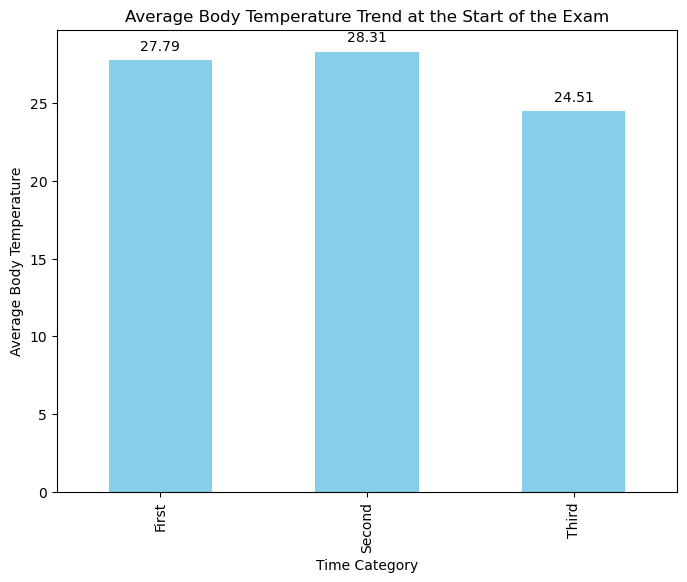

In [32]:
max_times = temp.groupby('Exam')['Time in mins'].max().reset_index()
max_times.columns = ['Exam', 'Max Time']
print(max_times)

temp = pd.merge(temp, max_times, on='Exam')

def categorize_time(row):
    if row['Time in mins'] <= row['Max Time'] / 3:
        return 'First'
    elif row['Time in mins'] <= 2 * row['Max Time'] / 3:
        return 'Second'
    else:
        return 'Third'
    

temp['Time Category'] = temp.apply(categorize_time, axis=1)


average_temp_by_category = temp.groupby('Time Category')['TEMP'].mean()

average_temp_by_category = temp.groupby('Time Category')['TEMP'].mean()
plt.figure(figsize=(8, 6))
bars = average_temp_by_category.plot(kind='bar', color='skyblue')


for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.2f}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Average Body Temperature Trend at the Start of the Exam')
plt.xlabel('Time Category')
plt.ylabel('Average Body Temperature')
plt.show()


Q16. What was the % difference between scores in both mid-terms vs the final


In [35]:
midterm = (grades['Midterm 1'] + grades['Midterm 2'])

grades['result'] = ((grades['final'] - midterm) / 200) * 100
print("Percentage difference of grades in both Midterms Vs Final:")
print(grades[['Student_id','result']])

Percentage difference of grades in both Midterms Vs Final:
  Student_id  result
0        S01    11.0
1        S02     6.5
2        S03    10.5
3        S04    -1.5
4        S05     6.5
5        S06    20.0
6        S07     6.5
7        S08     2.0
8        S09     3.5
9        S10   -18.5
